<a href="https://colab.research.google.com/github/hawkeyedatatsai/food-sales-predictions/blob/main/Heng_Tser_Tsai_Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Sales Predictions**
##### Heng-Tser Tsai




---



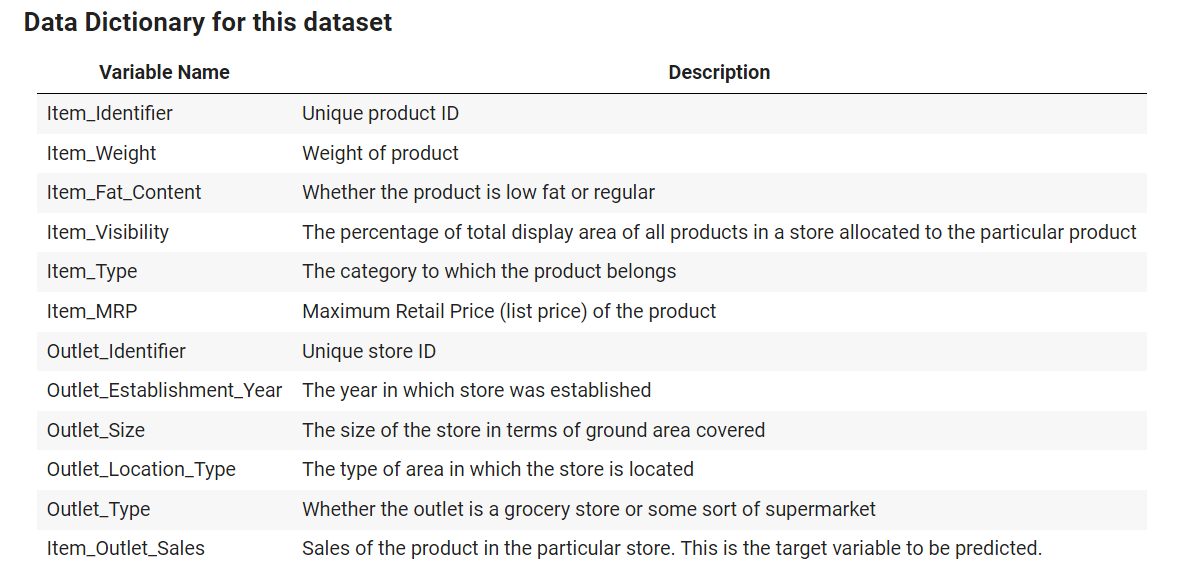

## Loading Data

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import StrMethodFormatter
price_fmt = StrMethodFormatter("₹{x:,.0f}")
filename = "/content/sales_predictions.csv"
df = pd.read_csv(filename)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning



###1. How many rows and columns

In [ ]:
df.shape

(8523, 12)

###2. What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###3. Are there duplicates? If so, drop any duplicates.


In [ ]:
df.duplicated().sum()

0

###4. Identify missing values.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

#### **1) Drop column?**

In [ ]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- not going to drop columns, since these two columns carry 17% and 28% missing data, both < 50%.

In [ ]:
df.loc[:, 'Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

- std>4 confirm its not normal distributed and not going to drop.

#### **2) analysizing missing values on Item_Weight through either Item_Type or Item_Fat_Content.**

In [ ]:
#decided to start with Item_Type first 
#because it makes sense the weight is correspond with items AND
#there are probably more filters to apply between items and fat_content, 5:3, from df.head().
Item_weight_missing_values_filter = df['Item_Weight'].isna()
df[Item_weight_missing_values_filter][['Item_Weight', "Item_Type"]]
#finds out 1463 rows w/ missing Item_Weight

,Item_Weight,Item_Type
7,NaN,Snack Foods
18,NaN,Hard Drinks
21,NaN,Baking Goods
23,NaN,Baking Goods
29,NaN,Canned
...,...,...
8485,NaN,Soft Drinks
8487,NaN,Soft Drinks
8488,NaN,Others
8490,NaN,Fruits and Vegetables


In [ ]:
df['Item_Type'].describe()
#find out there are 16 unique item_types 

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [ ]:
# find the avg Item_Weight on Item_Type
df.groupby('Item_Type').mean()["Item_Weight"]

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [ ]:
#df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean'))
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))
df[Item_weight_missing_values_filter][['Item_Weight', "Item_Type"]]

,Item_Weight,Item_Type
7,12.987880,Snack Foods
18,11.400328,Hard Drinks
21,12.277108,Baking Goods
23,12.277108,Baking Goods
29,12.305705,Canned
...,...,...
8485,11.847460,Soft Drinks
8487,11.847460,Soft Drinks
8488,13.853285,Others
8490,13.224769,Fruits and Vegetables


- fill missing values by mean within a group

In [ ]:
#option: maybe able to apply the same strategy from Item_Fat_Content
df.loc[:, 'Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- confirm no more missing data on Item_Weight

#### **3) Looking on Outlet_Size, assuming size has to do with either outlet location or sales price.**

In [ ]:
#decide to go w/ sales price because they are ints
#find out how many NANs are
df['Outlet_Size'].value_counts(dropna = False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#apply similiar strategy from above to find each Outlet_Size avg Item_Outlet_Sales
df.groupby('Outlet_Size',dropna = False).mean()["Item_Outlet_Sales"]

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
NaN       1822.626947
Name: Item_Outlet_Sales, dtype: float64

- since the avg sales in NaN are close to Small, decide to fill NAN with Small 

In [ ]:
df['Outlet_Size'].fillna("Small", inplace=True)
df['Outlet_Size'].value_counts(dropna = False)

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- confirm no missing values on both columns now.

###6. Confirm that there are no missing values after addressing them.

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
#analysize unique dada on objects inlcuding Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type
pd.unique(df["Outlet_Identifier"])

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [ ]:
pd.unique(df["Item_Identifier"])

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
pd.unique(df["Item_Fat_Content"])

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
##df['Sex'] = df['Sex'].replace('F', 'female')
##df['Sex'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
pd.unique(df["Outlet_Type"])

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
pd.unique(df["Item_Type"])

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
pd.unique(df["Outlet_Size"])

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
pd.unique(df["Outlet_Location_Type"])

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
pd.unique(df["Outlet_Type"])

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

###8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

###1. Histogram to view the distributions of various features in your dataset.

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


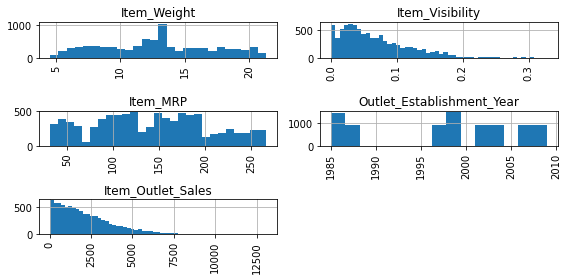

In [ ]:
df.hist(figsize=(8,4), xrot=90, bins="auto")
plt.tight_layout()
plt.show;

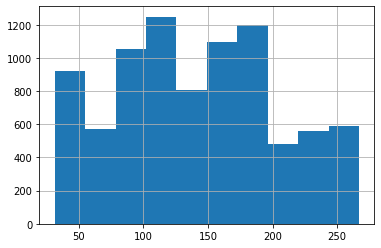

In [ ]:
ax = df['Item_MRP'].hist()

Text(0, 0.5, 'Number of Items')

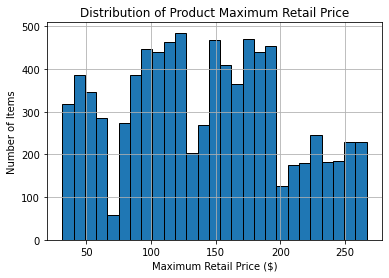

In [ ]:
ax = df['Item_MRP'].hist(bins = 'auto', edgecolor = 'black') 

#removing scientific notation from the x-axis
ax.ticklabel_format(style='plain')

#only rotate the x-axis, so "axis='x'" 
#rotation=45 (rotate the labels 45 degrees).
ax.tick_params(axis='x')

#add titles and labels
ax.set_title('Distribution of Product Maximum Retail Price')
ax.set_xlabel('Maximum Retail Price ($)')
ax.set_ylabel('Number of Items')

###2. Boxplot to view statistical summaries of various features in your dataset.

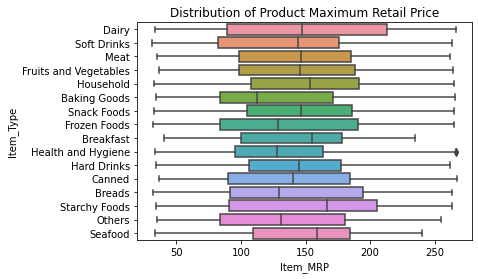

In [ ]:
ax = sns.boxplot(x='Item_MRP', y='Item_Type', data=df)
ax.set_title("Distribution of Product Maximum Retail Price");

In [ ]:
# try combine histogram and boxplot together



###3. Heatmap of the correlation between features.

<Axes: >

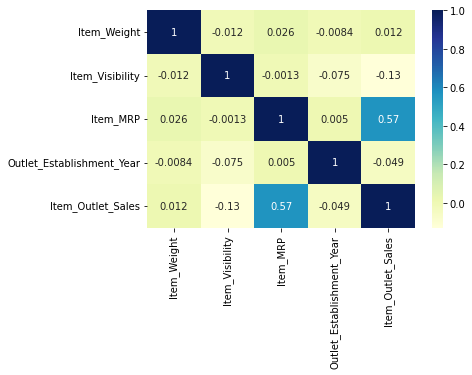

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot = True)

###4. using a different feature and try to create PLT and seaborn to compare and make multi subplots

####1). boxplot between Items sales in different size of outlets

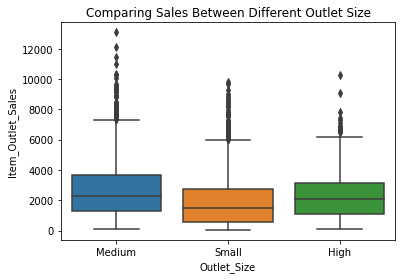

In [ ]:
#ax = sns.boxplot(x='diagnosis', y='area_mean', data=df)
#ax.set_title("Comparing  Area of Benign vs Malignant Tumors");

ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Sales Between Different Outlet Size");


####2). Multisubplots betweeb Item_MRP, Outlet_size and Item_Outlet_Sales.

In [ ]:
small_filter = df['Outlet_Size'] == "Small"
df_small = df.loc[small_filter]

med_filter = df['Outlet_Size'] == "Medium"
df_med = df.loc[med_filter]

high_filter = df['Outlet_Size'] == "High"
df_high = df.loc[high_filter]

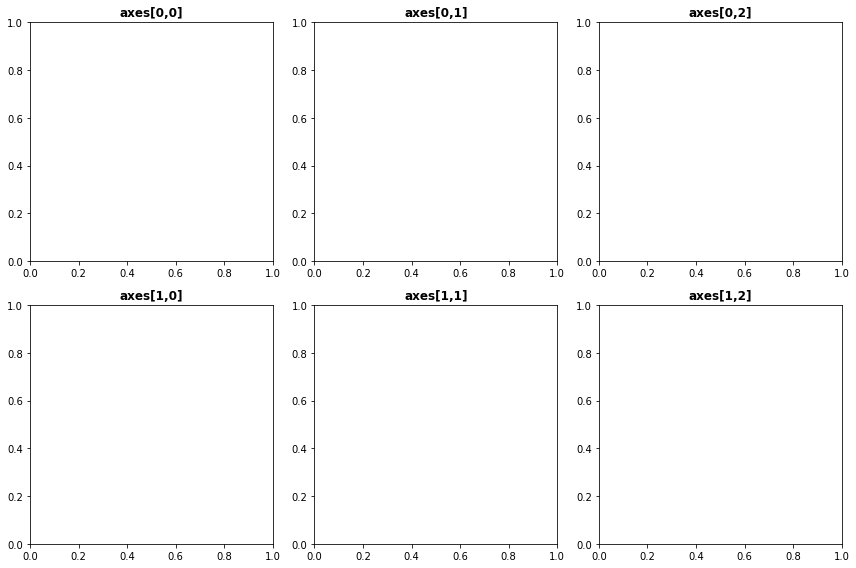

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
# Adding titles to the top row 
axes[0,0].set_title("axes[0,0]", fontweight="bold")
axes[0,1].set_title("axes[0,1]", fontweight="bold")
axes[0,2].set_title("axes[0,2]", fontweight="bold")
## Adding titles to the bottom row
axes[1,0].set_title("axes[1,0]", fontweight="bold")
axes[1,1].set_title("axes[1,1]", fontweight="bold");
axes[1,2].set_title("axes[1,2]", fontweight="bold");
fig.tight_layout()

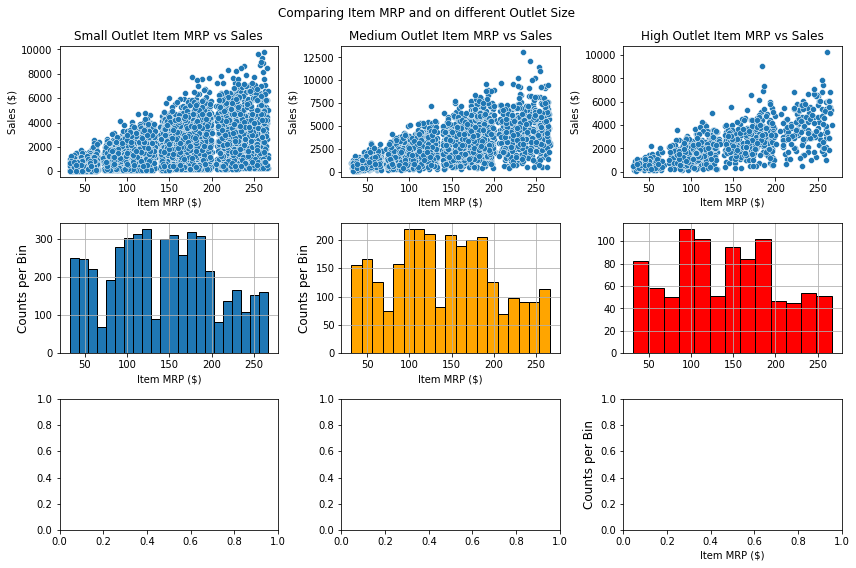

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
## Plotting small data
# Subplot 0,0 (top-left)
sns.scatterplot(data=df_small, x='Item_MRP', y='Item_Outlet_Sales', ax=axes[0,0])
axes[0,0].set_title('Small Outlet Item MRP vs Sales', fontsize = 12)
axes[0,0].set_ylabel("Sales ($)")
axes[0,0].set_xlabel("Item MRP ($)")

# Subplot 1,0 (bottom-left)
df_small['Item_MRP'].hist(bins='auto', edgecolor='black', ax=axes[1,0])
axes[1,0].set_ylabel('Counts per Bin', fontsize = 12);
axes[1,0].set_xlabel("Item MRP ($)")

## Plotting med data
# Subplot 0,1 (middle-right)
sns.scatterplot(data=df_med, x='Item_MRP', y='Item_Outlet_Sales', ax=axes[0,1])
axes[0,1].set_title('Medium Outlet Item MRP vs Sales', fontsize = 12);
axes[0,1].set_ylabel("Sales ($)")
axes[0,1].set_xlabel("Item MRP ($)")
# Subplot 1,1 (middle-right)
df_med['Item_MRP'].hist(bins='auto', edgecolor='black', ax=axes[1,1],
                         color='orange')
axes[1,1].set_ylabel('Counts per Bin', fontsize = 12);
axes[1,1].set_xlabel("Item MRP ($)")

## Plotting high data
# Subplot 0,2 (top-right)
sns.scatterplot(data=df_high, x='Item_MRP', y='Item_Outlet_Sales', ax=axes[0,2])
axes[0,2].set_title('High Outlet Item MRP vs Sales', fontsize = 12);
axes[0,2].set_ylabel("Sales ($)")
axes[0,2].set_xlabel("Item MRP ($)")
# Subplot 2,2 (bottom-right)
df_high['Item_MRP'].hist(bins='auto', edgecolor='black', ax=axes[1,2],
                         color='red')
axes[2,2].set_ylabel('Counts per Bin', fontsize = 12);
axes[2,2].set_xlabel("Item MRP ($)")

## Plotting High data

## Figure title and fixing overlap
fig.suptitle("Comparing Item MRP and on different Outlet Size ");
fig.tight_layout();

## Explanatory Visuals

 The goal of this is to ***help the retailer understand the properties of products and outlets*** that play crucial roles in increasing sales. Your task is to **build several data visualizations** to help your stakeholders better understand trends in the data. 

### What are the top 10 selling item?

In [137]:
top10sells_df = round(df.groupby('Item_Identifier')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False).head(10),2)
top10sells_df

,sum
Item_Identifier,
FDY55,42661.80
FDA15,41584.54
FDZ20,40185.02
FDF05,36555.75
FDA04,35741.48
FDK03,34843.98
NCQ06,34680.19
NCQ53,34508.41
FDJ55,33531.02


In [138]:
#from babel.numbers import format_decimal
#format_currency(5433422.8012, 'INR', locale='en_IN')

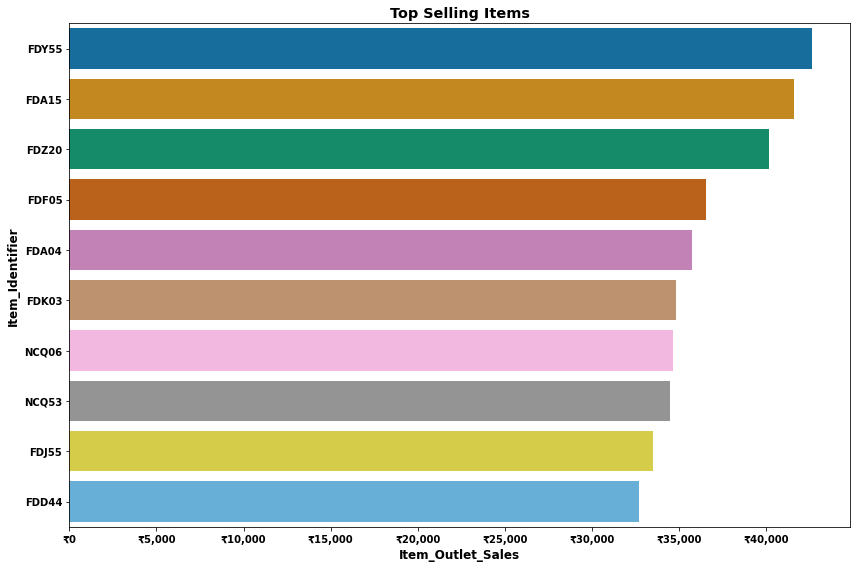

In [148]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=top10sells_df,x='sum',y=top10sells_df.index, ax=ax,
                 palette="colorblind")

plt.title('Top Selling Items', fontsize = 'x-large', weight='bold')
plt.xlabel('Item_Outlet_Sales', fontsize = 'large', weight='bold')
plt.ylabel('Item_Identifier', fontsize = 'large', weight='bold');
plt.xticks(fontsize = "medium", weight='semibold')
plt.yticks(fontsize = "medium", weight='semibold');
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show;

Item Identifier FDY55, FDA15 and FDZ20 are top three best selling items

### Does outlet type affect sales?

In [ ]:
df['Outlet_Type'].value_counts(normalize=True).round(2)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [ ]:
#similiar strategy from previous question
topsalesoutlet_df = round(df.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['sum']).sort_values('sum', ascending = False).head(10),2)
topsalesoutlet_df

,sum
Outlet_Type,
Supermarket Type1,12917342.26
Supermarket Type3,3453926.05
Supermarket Type2,1851822.83
Grocery Store,368034.27


In [145]:
def million_format(x, pos):
  return '{:.0f}M'.format(x/1000000)

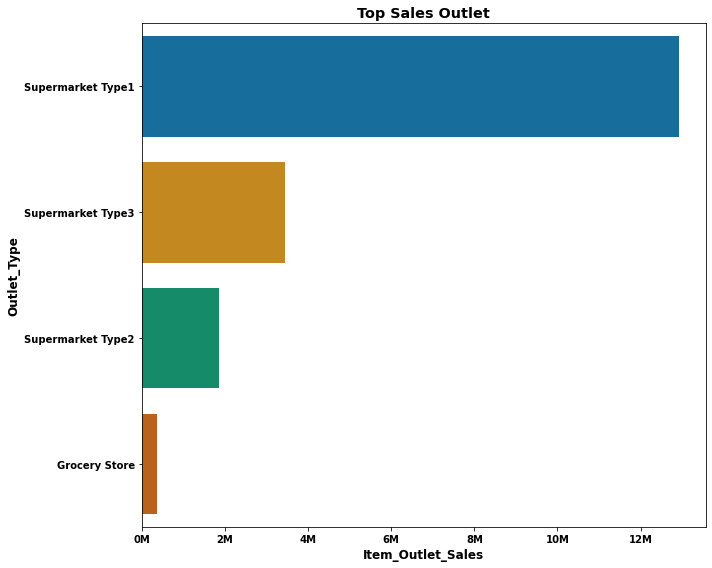

In [149]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=topsalesoutlet_df,x='sum',y=topsalesoutlet_df.index, ax=ax,
                 palette="colorblind")

plt.title('Top Sales Outlet', fontsize = 'x-large', weight='bold')
plt.xlabel('Item_Outlet_Sales', fontsize = 'large', weight='bold')
plt.ylabel('Outlet_Type', fontsize = 'large', weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');

# apply formatter to x-axis
ax.xaxis.set_major_formatter(million_format)
plt.tight_layout()
plt.show;

Supermarket Type 1 has the most sales whilst Grocery stores with the least

### Does where the item locate affect sales?

In [176]:
def thousand_format(x, pos):
  return '{:.0f}K'.format(x/1000)

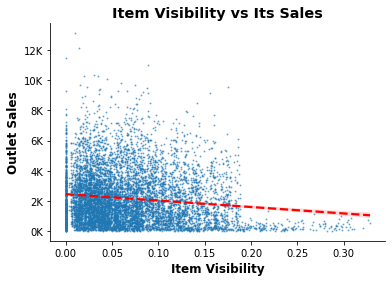

In [192]:
sns.regplot(data = df, y = 'Item_Outlet_Sales', x= "Item_Visibility",
            scatter_kws={'alpha': 0.5,
                         "s": 1},
            line_kws = {'color':'red', 'linestyle':'--'});

plt.title('Item Visibility vs Its Sales', fontsize = 'x-large', weight='bold')
plt.xlabel('Item Visibility', fontsize = 'large', weight='bold')
plt.ylabel('Outlet Sales', fontsize = 'large', weight='bold');

plt.gca().yaxis.set_major_formatter(thousand_format)
sns.despine()

In [196]:
from scipy import stats
stats.pearsonr(df['Item_Visibility'], df['Item_Outlet_Sales'])

PearsonRResult(statistic=-0.12862461222077026, pvalue=9.041287179920723e-33)

pesrsonr function was studied from [a python tutorial material from Simon Fraser University in Canada](https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html). 
Results above suggest there is a negative correplation between these two columns. 